In [23]:
!pip install networkx pyvis --quiet

In [24]:
!pip install python-louvain adjustText --quiet

In [25]:
import json
import networkx as nx
from google.colab import drive

In [27]:
drive.mount('/content/drive')

json_path = "/content/drive/MyDrive/cr_projeto/graph_data_en.json"
with open(json_path, 'r', encoding="utf-8") as f:
    data = json.load(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
G = nx.Graph()
G.add_nodes_from(data['nodes'])
G.add_weighted_edges_from([(e['source'], e['target'], e['weight'])
                           for e in data['edges']])

In [42]:
import matplotlib.cm as cm, matplotlib.colors as mcolors

domain_map = {
    # ───────────── Mathematics ─────────────
    "Classical Analysis and ODEs":           "Mathematics",
    "Functional Analysis":                   "Mathematics",
    "Numerical Analysis":                    "Mathematics",
    "PDE Analysis":                          "Mathematics",
    "Rings and Algebras":                    "Mathematics",
    "Applications":                          "Mathematics",
    "Combinatorics":                         "Mathematics",
    "Algebraic Geometry":                    "Mathematics",
    "Differential Geometry":                 "Mathematics",
    "Metric Geometry":                       "Mathematics",
    "Symplectic Geometry":                   "Mathematics",
    "K-Theory and Homology":                 "Mathematics",
    "Logic":                                 "Mathematics",
    "Discrete Mathematics":                  "Mathematics",
    "General Mathematics":                   "Mathematics",
    "Optimization and Control":              "Mathematics",
    "Dynamical Systems":                     "Mathematics",
    "Spectral Theory":                       "Mathematics",
    "Information Theory (Mathematics)":      "Mathematics",
    "Representation Theory":                 "Mathematics",
    "Category Theory":                       "Mathematics",
    "Group Theory":                          "Mathematics",
    "Number Theory":                         "Mathematics",
    "Algebraic Topology":                    "Mathematics",
    "Geometric Topology":                    "Mathematics",
    "General Topology":                      "Mathematics",
    "Complex Variables":                     "Mathematics",
    "Commutative Algebra":                   "Mathematics",
    "Quantum Algebra":                       "Mathematics",
    "Operator Algebras":                     "Mathematics",
    "Mathematical Physics":                  "Mathematics",

    # ───────────── Computing ─────────────
    "Machine Learning":                      "Computing",
    "Hardware Architecture":                 "Computing",
    "Databases":                             "Computing",
    "Digital Libraries":                     "Computing",
    "Computer Science and Game Theory":      "Computing",
    "Computational Complexity":              "Computing",
    "Computers and Society":                 "Computing",
    "Distributed, Parallel, and Cluster Computing": "Computing",
    "Computer Graphics":                     "Computing",
    "Neural and Evolutionary Computing":     "Computing",
    "Symbolic Computation":                  "Computing",
    "Computation and Language":              "Computing",
    "Cryptography and Security":             "Computing",
    "Performance":                           "Computing",
    "Software Engineering":                  "Computing",
    "Engineering, Finance, and Computational Sciences": "Computing",
    "Data Structures and Algorithms":        "Computing",
    "Computational Geometry":                "Computing",
    "Artificial Intelligence":               "Computing",
    "Human-Computer Interaction":           "Computing",
    "Formal Languages and Automata Theory":  "Computing",
    "Programming Languages":                 "Computing",
    "Logic in Computer Science":             "Computing",
    "Multimedia":                            "Computing",
    "Other Topics in Computer Science":      "Computing",
    "Information Retrieval":                 "Computing",
    "Social and Information Networks":       "Computing",
    "Networks and Internet Architecture":    "Computing",
    "Robotics":                              "Computing",
    "Multiagent Systems":                    "Computing",
    "Operating Systems":                     "Computing",
    "Systems and Control":                   "Computing",
    "Mathematical Software":                 "Computing",
    "Sound":                                 "Computing",
    "Emerging Technologies":                 "Computing",
    "Information Theory (Computing)":        "Computing",
    "Computer Vision and Pattern Recognition": "Computing",

    # ───────────── Statistics ─────────────
    "Statistical Learning":                  "Statistics",
    "Statistical Computing":                 "Statistics",
    "Other Topics in Statistics":            "Statistics",
    "Probability":                           "Statistics",
    "Statistical Theory":                    "Statistics",

    # ───────────── Other / Interdisciplinary ─────────────
    "History and Overview":                  "Other",
    "General Literature":                    "Other",
    "Methodology":                           "Other",
}

domains     = sorted({domain_map.get(n,"Other") for n in G})
domain2col  = {d:cm.get_cmap('Set2')(i/len(domains)) for i,d in enumerate(domains)}
node_colors = [domain2col[domain_map.get(n,"Other")] for n in G]

/tmp/ipython-input-42-2129071402.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  domain2col  = {d:cm.get_cmap('Set2')(i/len(domains)) for i,d in enumerate(domains)}


In [47]:
strength = {n:sum(d['weight'] for *_,d in G.edges(n, data=True)) for n in G}
s_max    = max(strength.values())
node_sizes = [80 + 2500*(strength[n]/s_max)**.75 for n in G]

In [48]:
fsize = {n: 6 + 8*(strength[n]/s_max)**.75 for n in G}

In [49]:
deg_thr = 20
labels = {n:n for n in G if G.degree(n) >= deg_thr}

In [50]:
import math
import numpy as np

weights = np.array([d['weight'] for *_,d in G.edges(data=True)])
w_min, w_max = weights.min(), weights.max()

edge_props = {}
for u,v,d in G.edges(data=True):
    w = d['weight']
    norm   = (math.log1p(w) - math.log1p(w_min)) / (math.log1p(w_max)-math.log1p(w_min))
    width  = 0.5 + 3*norm
    alpha  = 0.15 + 0.65*norm
    edge_props[(u,v)] = (width, alpha)

In [51]:
pos = nx.spring_layout(G, seed=42, k=10, weight='weight')

In [52]:
deg_thr = 25
labels  = {n:n for n,deg in G.degree() if deg >= deg_thr}

/tmp/ipython-input-53-1608180263.py:65: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([],[], c=c, s=140, label=d)


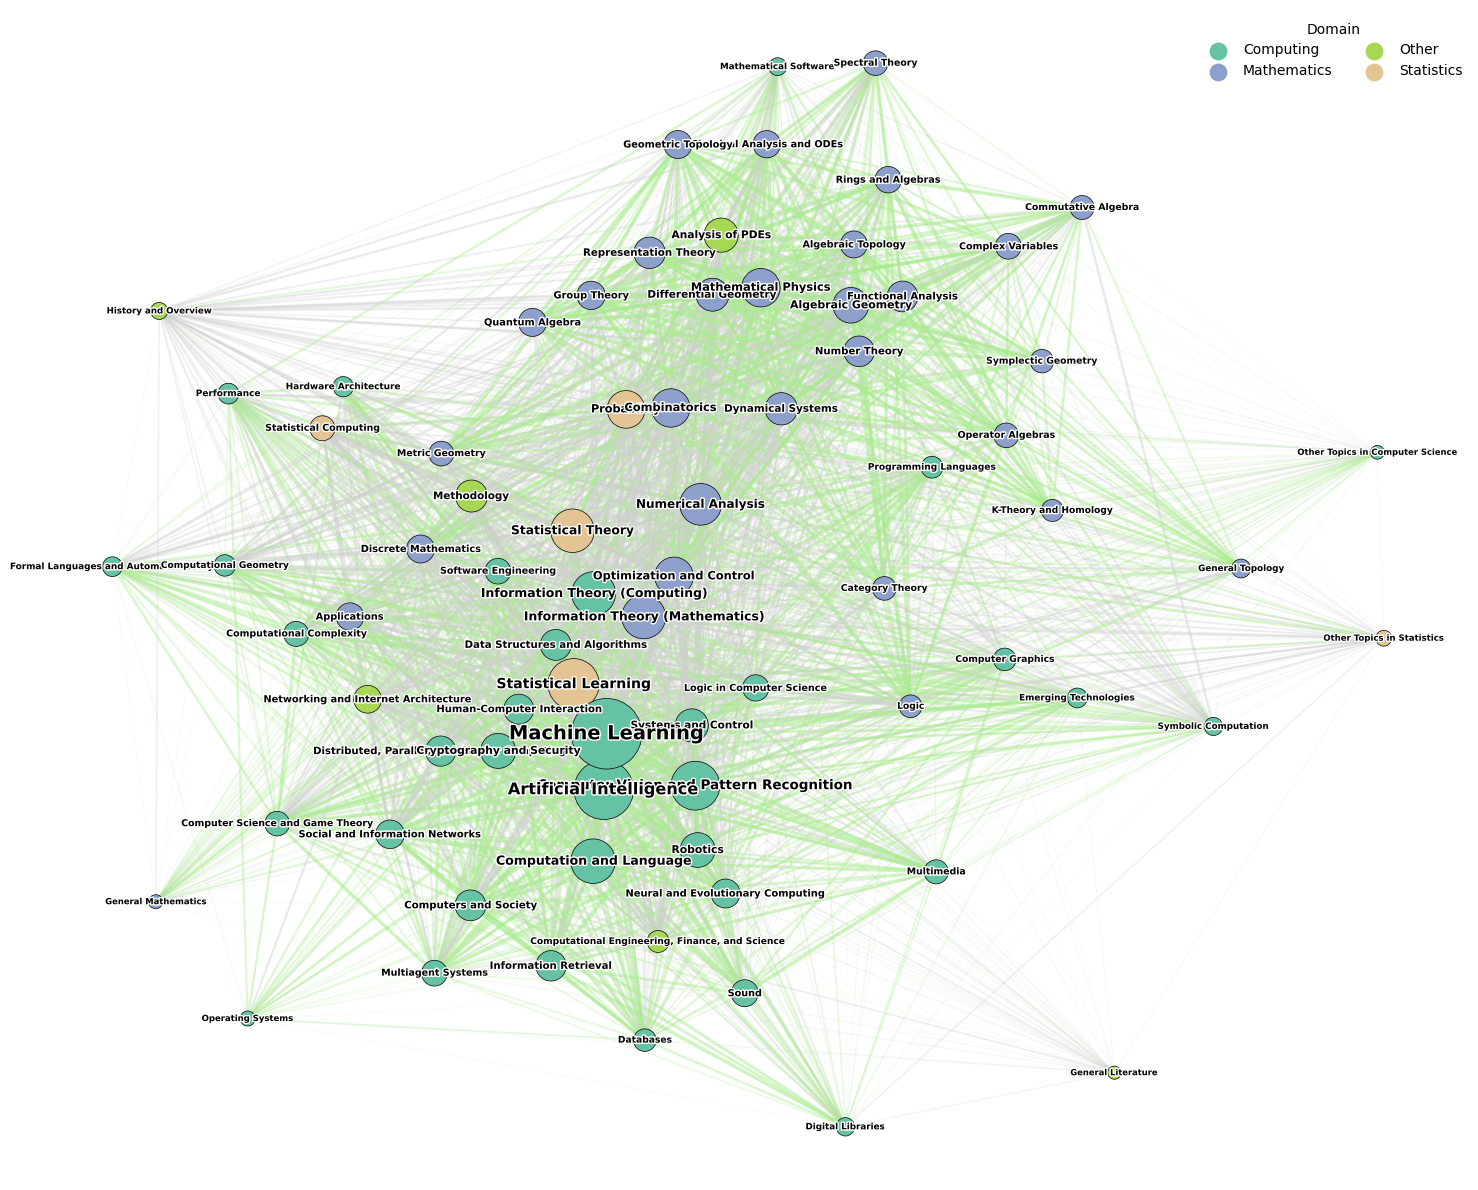

In [53]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from adjustText import adjust_text
import math
import numpy as np
import matplotlib.cm as cm, matplotlib.colors as mcolors

plt.figure(figsize=(15,12))
ax = plt.gca()

# for (u,v), (lw, a) in edge_props.items():
#    ax.plot([pos[u][0], pos[v][0]], [pos[u][1], pos[v][1]],
#            linewidth=lw, alpha=a, color='#5c8dc1')

for (u, v), (lw, a) in edge_props.items():
    same_domain = domain_map.get(u,'Other') == domain_map.get(v,'Other')
    col = '#a9ec8d' if same_domain else '#d0d0d0'
    ax.plot([pos[u][0], pos[v][0]],
            [pos[u][1], pos[v][1]],
            linewidth=lw, alpha=a,
            color=col, zorder=1)

size_map   = {n: s for n, s in zip(G.nodes(), node_sizes)}
color_map  = {n: domain2col[domain_map.get(n,"Other")] for n in G}

nodes_sorted = sorted(G.nodes(), key=lambda n: strength[n])

sizes_sorted  = [size_map[n]  for n in nodes_sorted]
colors_sorted = [color_map[n] for n in nodes_sorted]

# nx.draw_networkx_nodes(
#    G, pos,
#    node_size=node_sizes,
#    node_color=node_colors,
#    edgecolors='black', linewidths=.4
#)

nx.draw_networkx_nodes(
    G, pos,
    nodelist=nodes_sorted,
    node_size=sizes_sorted,
    node_color=colors_sorted,
    edgecolors='black', linewidths=.5
)

texts=[]
#for n,lab in labels.items():
#    t = ax.text(pos[n][0], pos[n][1], lab,
#                fontsize=fsize[n], fontweight='bold', ha='center', va='center', zorder=5,
#                path_effects=[pe.withStroke(linewidth=2, foreground="white")])
#    texts.append(t)

_ = adjust_text(texts, arrowprops=dict(arrowstyle='-', lw=.2, color='#666666'))

for n in labels:
    z = 3 + strength[n] / s_max
    ax.text(pos[n][0], pos[n][1], n,
            fontsize=fsize[n], fontweight='bold',
            ha='center', va='center',
            path_effects=[pe.withStroke(linewidth=2,
                                        foreground="white")],
            zorder=z)

for d,c in domain2col.items():
    ax.scatter([],[], c=c, s=140, label=d)
ax.legend(frameon=False, title='Domain', ncol=2, bbox_to_anchor=(1.02,1))

plt.axis('off'); plt.tight_layout()
plt.savefig('graph.png', dpi=300, bbox_inches='tight')
plt.show()

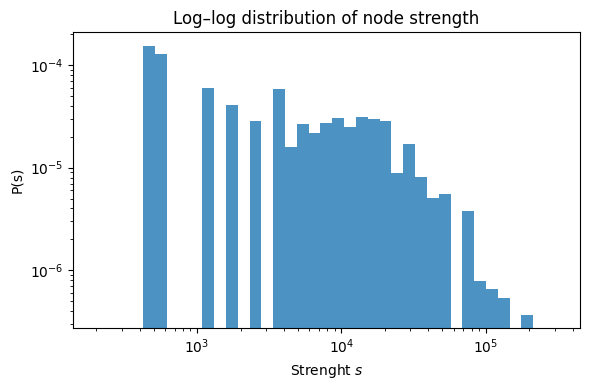

In [56]:
import numpy as np, matplotlib.pyplot as plt

strengths = np.array([s for s in strength.values()])
bins = np.logspace(np.log10(strengths.min()), np.log10(strengths.max()), 40)

plt.figure(figsize=(6,4))
plt.hist(strengths, bins=bins, density=True, alpha=.8, color='#1f77b4')
plt.xscale('log'); plt.yscale('log')
plt.xlabel('Strenght $s$'); plt.ylabel('P(s)')
plt.title('Log–log distribution of node strength')
plt.tight_layout(); plt.savefig('fig_strength_dist.png', dpi=300)

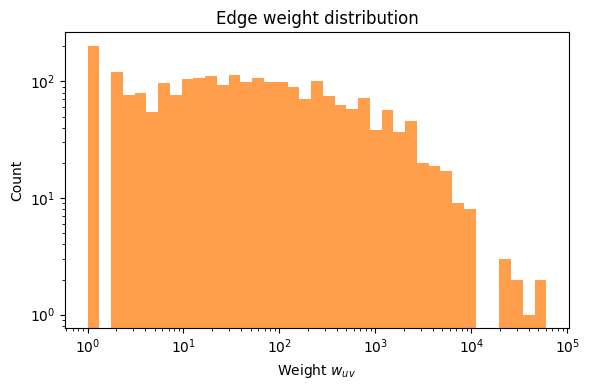

In [57]:
weights = np.array([d['weight'] for *_,d in G.edges(data=True)])
bins = np.logspace(np.log10(weights.min()), np.log10(weights.max()), 40)

plt.figure(figsize=(6,4))
plt.hist(weights, bins=bins, color='#ff7f0e', alpha=.75)
plt.xscale('log'); plt.yscale('log')
plt.xlabel('Weight $w_{uv}$'); plt.ylabel('Count')
plt.title('Edge weight distribution')
plt.tight_layout(); plt.savefig('fig_weight_hist.png', dpi=300)

In [58]:
!pip install -q --upgrade python-louvain

In [59]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

try:
    import community.community_louvain as community_louvain
    part = community_louvain.best_partition(G, weight='weight', resolution=1.0)

    comm_dict = {}
    for n, cid in part.items():
        comm_dict.setdefault(cid, []).append(n)
    comm_list = [set(nodes) for nodes in comm_dict.values()]
    method_used = "Louvain (python-louvain)"
except (ModuleNotFoundError, AttributeError):

    comm_list = list(greedy_modularity_communities(G, weight='weight'))
    part = {n: cid for cid, comm in enumerate(comm_list) for n in comm}
    method_used = "greedy modularity (NetworkX)"

comm_list.sort(key=len, reverse=True)
comm_sizes = [len(c) for c in comm_list]

print(f"{method_used}: {len(comm_list)} detected communities")
for i, c in enumerate(comm_list, 1):
    print(f"  Community {i}: {len(c)} nodes")

Louvain (python-louvain): 6 detected communities
  Community 1: 31 nodes
  Community 2: 26 nodes
  Community 3: 6 nodes
  Community 4: 5 nodes
  Community 5: 5 nodes
  Community 6: 3 nodes


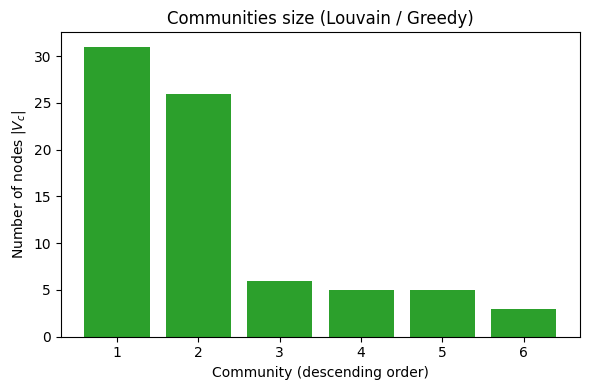

In [63]:
plt.figure(figsize=(6,4))
plt.bar(range(1, len(comm_sizes)+1), comm_sizes, color='#2ca02c')
plt.xlabel('Community (descending order)');
plt.ylabel('Number of nodes $|V_c|$')
plt.title('Communities size (Louvain / Greedy)')
plt.tight_layout();
plt.savefig('fig_comm_sizes.png', dpi=300)
plt.show()

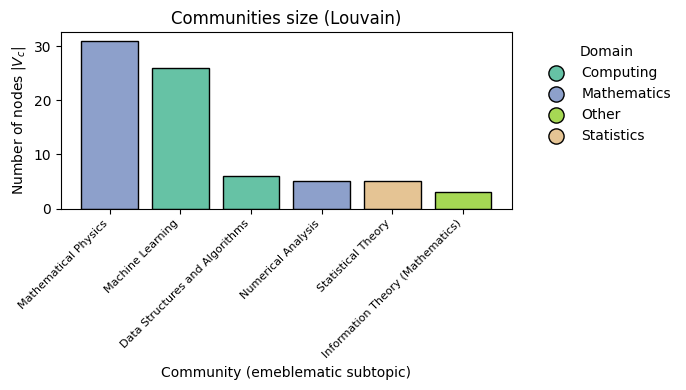

In [65]:
import matplotlib.pyplot as plt
from collections import Counter

sizes   = []
labels  = []
barcols = []

for comm in comm_list:                       # comm_list = setlist
    sizes.append(len(comm))

    # predominant domain
    dom_count = Counter(domain_map.get(n, "Other") for n in comm)
    dom_major = dom_count.most_common(1)[0][0]

    # emblematic subtopic = greatest strength within the community
    topic = max(comm, key=lambda n: strength[n])
    labels.append(topic)

    # bar color
    barcols.append(domain2col[dom_major])

plt.figure(figsize=(7,4))
bars = plt.bar(range(1, len(sizes)+1), sizes, color=barcols,
               edgecolor='black')

plt.xticks(range(1, len(labels)+1), labels, rotation=45, ha='right', fontsize=8)
plt.xlabel("Community (emeblematic subtopic)")
plt.ylabel("Number of nodes $|V_c|$")
plt.title("Communities size (Louvain)")

for dom, col in domain2col.items():
    plt.scatter([], [], color=col, label=dom, s=120, edgecolors='black')
plt.legend(frameon=False, title="Domain", bbox_to_anchor=(1.04, 1), loc='upper left')

plt.tight_layout()
plt.savefig("fig_comm_sizes_semantic.png", dpi=300, bbox_inches="tight")
plt.show()

In [67]:
import pandas as pd

rows = []
for i, comm in enumerate(comm_list, start=1):
    sub = G.subgraph(comm)
    s_mean = sum(dict(sub.degree(weight='weight')).values()) / len(sub)
    dens_intra = 0.0
    n = sub.number_of_nodes()
    if n > 1:
        dens_intra = 2*sub.number_of_edges() / (n*(n-1))
    rows.append(dict(Community=i, Nos=n, StrengthAvg=s_mean, Density=dens_intra))

df_comm = pd.DataFrame(rows)
display(df_comm)

,Community,Nos,StrengthAvg,Density
0,1,31,18240.580645,0.995699
1,2,26,37688.538462,0.981538
2,3,6,3411.000000,1.000000
3,4,5,18255.200000,1.100000
4,5,5,19930.400000,1.100000
5,6,3,37472.000000,1.000000


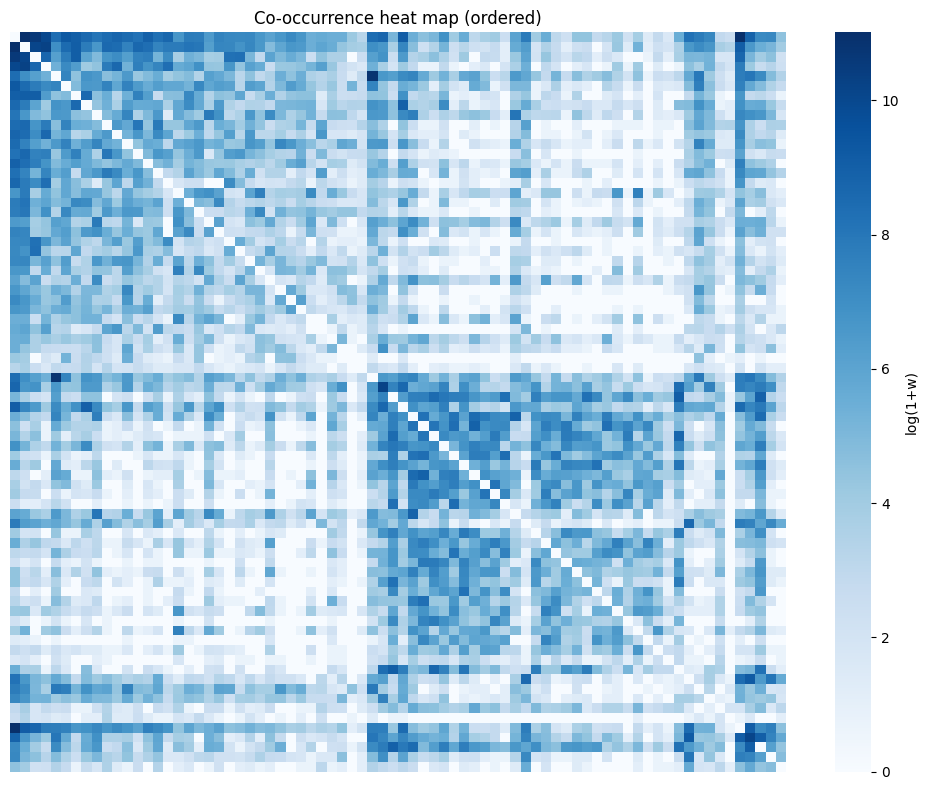

In [68]:
import pandas as pd, seaborn as sns
order = sorted(G.nodes, key=lambda n: (domain_map.get(n,'Other'), -strength[n]))
A = nx.to_numpy_array(G, nodelist=order, weight='weight')
df = pd.DataFrame(A, index=order, columns=order)

plt.figure(figsize=(10,8))
sns.heatmap(np.log1p(df), cmap='Blues', cbar_kws={'label':'log(1+w)'})
plt.xticks([],[]); plt.yticks([],[])          # tira ticks para caber
plt.title('Co-occurrence heat map (ordered)')
plt.tight_layout(); plt.savefig('fig_heatmap.png', dpi=300)

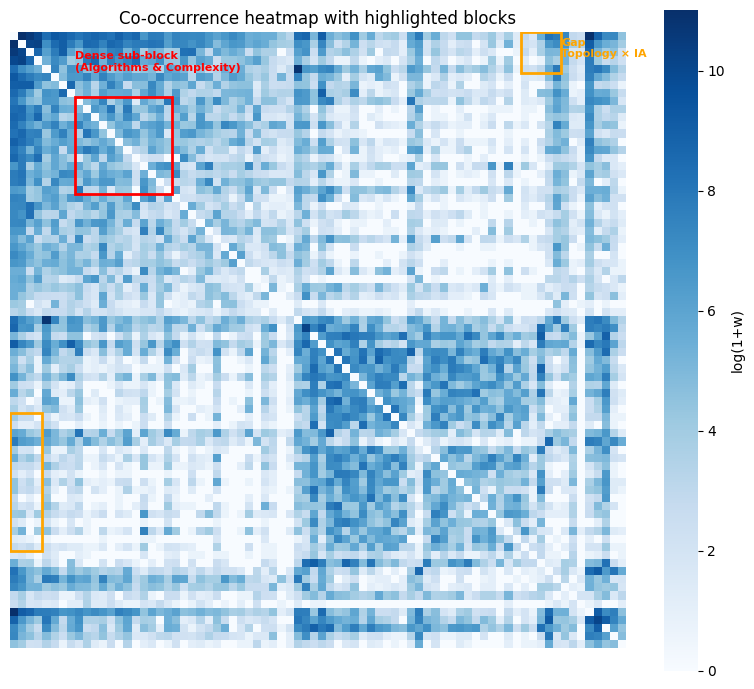

In [69]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
import matplotlib.patches as patches

logA = np.log1p(A)                # uses log(1+w) for contrast

plt.figure(figsize=(8,7))
ax = sns.heatmap(logA, cmap='Blues', cbar_kws={'label':'log(1+w)'}, square=True,
                 xticklabels=False, yticklabels=False)

names = {name: idx for idx, name in enumerate(order)}

block_comp = sorted([names["Data Structures and Algorithms"],
                     names["Data Structures and Algorithms"],  # duplicate to get correct row/column
                     names["Computational Complexity"]])
i0, i1 = block_comp[0], block_comp[-1]

blk_topo = names["General Topology"]
blk_ml   = names["Machine Learning"]

rect1 = patches.Rectangle((i0, i0),
                          i1-i0+1, i1-i0+1,
                          linewidth=2, edgecolor='red',
                          facecolor='none')
rect2 = patches.Rectangle((blk_topo, blk_ml),
                          5, 5,
                          linewidth=2, edgecolor='orange',
                          facecolor='none')

ix_topologia = [order.index(x) for x in order if "Topology" in x][:3]  # 3 top lines
ix_ml        = [order.index("Machine Learning")]

i_top, j_top = min(ix_topologia), max(ix_topologia)
i_ml  = ix_ml[0]

w = 4          # visual width ~ number of topics AI wants to highlight
rect_lacuna = patches.Rectangle((i_ml, i_top),   # col, row
                                w,               # col span
                                j_top - i_top+1, # row span
                                linewidth=2,
                                edgecolor='orange',
                                facecolor='none')
ax.add_patch(rect_lacuna)

ax.add_patch(rect1)
ax.add_patch(rect2)


ax.text(i0, i0-3, "Dense sub-block\n(Algorithms & Complexity)",
        color='red', ha='left', va='bottom', fontsize=8, fontweight='bold')

ax.text(blk_topo+5, blk_ml+2, "Gap\nTopology × IA",
        color='orange', ha='left', va='center', fontsize=8, fontweight='bold')

plt.title("Co-occurrence heatmap with highlighted blocks")
plt.tight_layout()
plt.savefig("fig_heatmap_destacado.png", dpi=300)
plt.show()

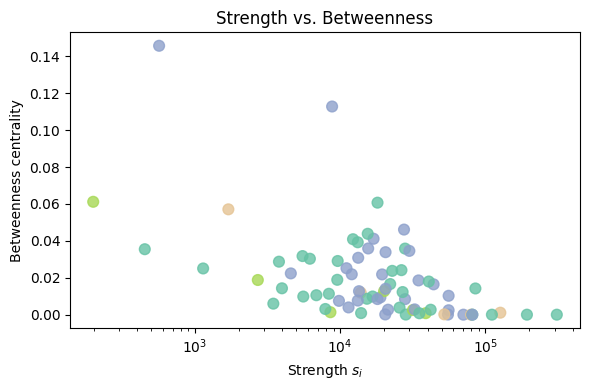

In [70]:
btw = nx.betweenness_centrality(G, weight='weight', normalized=True)
plt.figure(figsize=(6,4))
plt.scatter(strengths, [btw[n] for n in G], c=node_colors, alpha=.8, s=60)
plt.xscale('log')
plt.xlabel('Strength $s_i$'); plt.ylabel('Betweenness centrality')
plt.title('Strength vs. Betweenness')
plt.tight_layout(); plt.savefig('fig_strength_btw.png', dpi=300)

/tmp/ipython-input-71-1985503268.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dens_intra, dens_inter], labels=['Intra','Inter'])


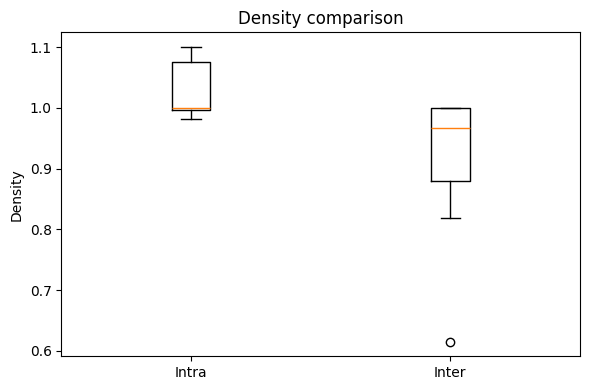

In [71]:
from itertools import combinations
dens_intra = [2*G.subgraph(comm).number_of_edges()/
              (len(comm)*(len(comm)-1)) for comm in comm_list]

dens_inter = []
for c1, c2 in combinations(comm_list, 2):
    e = 0
    for u in c1:
        e += sum(1 for v in G[u] if v in c2)
    dens_inter.append(e/(len(c1)*len(c2)))

plt.figure(figsize=(6,4))
plt.boxplot([dens_intra, dens_inter], labels=['Intra','Inter'])
plt.ylabel('Density')
plt.title('Density comparison')
plt.tight_layout(); plt.savefig('fig_density_box.png', dpi=300)